In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
np.random.seed(42)

In [102]:
binary_cols = ['ss', 'interest', 'weekend_study', 'bad_sleep', 'glasses', 'anime', 'study_form', 'literature']
my_col = binary_cols[1 % 8]
my_col

'interest'

In [103]:
df = pd.read_csv('../datasets/famcs_students.csv')
df.head()

,cource,group,stream,sex,age,ss,interest,os,weekend_study,bad_sleep,...,social,sport,miss,study_form,foot_size,eye_color,score,retake,hostel,literature
0,4,11,Прикладная информатика,М,20.0,Нет,Математика,MacOS,Да,Да,...,Экстраверт,"Редко, легкая физкультура",3.0,Бюджет,48.0,Карие,9.2,0,"Нет, я из Минска",Да
1,4,11,Прикладная информатика,Ж,20.0,Нет,Программирование,MacOS,Нет,Нет,...,Экстраверт,"Да, я спортсмен",5.0,Бюджет,39.0,Зеленые,8.8,0,"Нет, я из Минска",Да
2,4,11,Прикладная информатика,Ж,19.0,Нет,Программирование,MacOS,Да,Нет,...,Экстраверт,Вообще нет,10.0,Бюджет,41.0,Карие,8.8,0,"Нет, я из Минска",Да
3,4,11,Прикладная информатика,Ж,20.0,Нет,Математика,MacOS,Да,Да,...,Экстраверт,"Да, я спортсмен",3.0,Бюджет,36.0,Карие,8.8,0,"Нет, я из Минска",Да
4,4,11,Прикладная информатика,М,20.0,Нет,Математика,Windows,Да,Нет,...,Интроверт,Вообще нет,1.0,Бюджет,46.0,Зеленые,9.0,0,"Нет, я из Минска",Да


In [104]:
df[my_col].value_counts()

interest
Программирование    103
Математика           24
Name: count, dtype: int64

In [105]:
df.columns

Index(['cource', 'group', 'stream', 'sex', 'age', 'ss', 'interest', 'os',
       'weekend_study', 'bad_sleep', 'glasses', 'work_experience', 'ai',
       'height', 'anime', 'social', 'sport', 'miss', 'study_form', 'foot_size',
       'eye_color', 'score', 'retake', 'hostel', 'literature'],
      dtype='object')

In [106]:
binary_cols = ['ss', 'interest', 'weekend_study', 'bad_sleep', 'glasses', 'literature', 'cource',  'hostel', 'sex', 'anime', 'study_form']
nomin_cols = ['os', 'ai', 'eye_color', 'group', 'stream']
order_cols = ['work_experience', 'sport', 'retake', 'social']
num_cols = ['height', 'miss', 'foot_size', 'score', 'age']

In [107]:
print(len(binary_cols) + len(nomin_cols) + len(order_cols) + len(num_cols))
print(len(df.columns))

25
25


In [108]:
from sklearn.preprocessing import LabelEncoder

for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [109]:
df = pd.get_dummies(df, columns=nomin_cols, prefix=nomin_cols, drop_first=True, dtype=int)

In [110]:
from sklearn.preprocessing import OrdinalEncoder

categories = [
    ['Не работаю', 'Меньше года', '1-2 года', 'более 2 лет'], 
    ['Вообще нет', 'Редко, легкая физкультура', 'Да, я спортсмен'],  
    ['0', '1', '2+'],
    ['Социофоб', 'Интроверт', 'Экстраверт']  
]

ordinal_encoder = OrdinalEncoder(categories=categories)
df[order_cols] = ordinal_encoder.fit_transform(df[order_cols])

In [111]:
corr_matrix = df.corr()
target_corrs = corr_matrix[my_col].drop(my_col)
top_features = target_corrs.abs().sort_values(ascending=False).head(12)
top_corr = target_corrs[top_features.index]
top_corr

height               0.247941
ai_gpt oss 120b     -0.184556
anime               -0.130380
work_experience      0.129668
score               -0.122042
foot_size            0.117760
eye_color_Карие     -0.113216
age                 -0.110105
study_form           0.102559
retake              -0.100962
eye_color_Зеленые    0.095375
sex                  0.088195
Name: interest, dtype: float64

In [112]:
column_names = top_corr.index.tolist()
column_names 

['height',
 'ai_gpt oss 120b',
 'anime',
 'work_experience',
 'score',
 'foot_size',
 'eye_color_Карие',
 'age',
 'study_form',
 'retake',
 'eye_color_Зеленые',
 'sex']

In [113]:
from sklearn.model_selection import train_test_split

y = df[my_col].values
X = df.drop(columns=[my_col])[column_names]

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, 
    test_size=0.15, 
    random_state=42,
    stratify=y  
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.176,  
    random_state=42,
    stratify=y_temp
)

In [114]:
num_cols = ['height', 'foot_size', 'score', 'age']

In [115]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train[num_cols] = ss.fit_transform(X_train[num_cols])
X_test[num_cols] = ss.transform(X_test[num_cols])
X_val[num_cols] = ss.transform(X_val[num_cols])

In [116]:
X_train.head()

,height,ai_gpt oss 120b,anime,work_experience,score,foot_size,eye_color_Карие,age,study_form,retake,eye_color_Зеленые,sex
42,1.322158,0,1,3.0,-0.679549,0.873565,0,0.488493,0,0.0,0,1
26,-0.820566,0,1,0.0,-0.032826,-0.304576,1,-0.307570,0,0.0,0,1
66,-0.134894,0,0,0.0,-0.154985,0.873565,0,-0.307570,0,0.0,0,1
2,0.893613,0,1,1.0,0.829472,-0.304576,1,-1.103632,0,0.0,0,0
106,0.893613,0,0,2.0,0.901330,0.579029,0,-0.307570,0,0.0,0,1


In [117]:
X_train = X_train.astype(np.float64).values
X_test = X_test.astype(np.float64).values
X_val = X_val.astype(np.float64).values

0. Тривиальный классификатор

In [118]:
from scipy import stats

class DummyClassifier():
    def __init__(self):
        self.mode = None

    def fit(self, X, y):
        self.mode = stats.mode(y)[0]
        return self

    def predict(self, X):
        return np.ones(X.shape[0]) * self.mode

In [119]:
from sklearn.metrics import (accuracy_score, f1_score, confusion_matrix,
                             precision_score, recall_score, roc_auc_score)

results = []

def save_results(y_test, y_pred, name, results):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    results.append({
        "model": name,
        "accuracy": acc,
        "precision": prec, "recall": rec, "f1": f1, 
        "tn": tn, "fp": fp, "fn": fn, "tp": tp
    })


In [120]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)

save_results(y_test, y_pred, 'Dummy', results)

1. Наивный байесовский классификатор

In [121]:
import numpy as np

class BinaryNaiveBayes:
    def __init__(self, eps=1e-9, lambda_y=None):
        self.eps = eps
        self.lambda_y = lambda_y

    def fit(self, X, y):
        self.classes = np.unique(y)
        if self.lambda_y is None:
            self.lambda_y = {cls: 1.0 for cls in self.classes}

        self.priors = {cls: np.mean(y == cls) for cls in self.classes}

        self.means = {}
        self.vars = {}
        for cls in self.classes:
            X_c = X[y == cls]
            self.means[cls] = X_c.mean(axis=0)
            self.vars[cls]  = X_c.var(axis=0) + self.eps 

    def _log_gauss_pdf(self, x, mean, var):
        return -0.5 * np.sum(np.log(2 * np.pi * var) + ((x - mean) ** 2) / var)

    def predict(self, X):
        predictions = []
        for x in X:
            posteriors = {}
            for cls in self.classes:
                # ln P(y)
                log_prior = np.log(self.lambda_y[cls] * self.priors[cls])
                # sum ln p(x_i | y)
                log_likelihood = self._log_gauss_pdf(x, self.means[cls], self.vars[cls])
                # ln P(y) + sum ln p(x_i | y)
                posteriors[cls] = log_prior + log_likelihood
            # argmax
            predictions.append(max(posteriors, key=posteriors.get))

        return np.array(predictions)

In [122]:
best_f1 = -1
best_lambdas = None
weights = [0.1, 0.2, 0.5, 0.7, 1]

for l0 in weights:
    for l1 in weights:
        model = BinaryNaiveBayes(lambda_y={0: l0, 1: l1})
        model.fit(X_train, y_train)

        preds = model.predict(X_val)
        f1 = f1_score(y_val, preds)

        if f1 > best_f1:
            best_acc = f1
            best_lambdas = (l0, l1)

print("штрафы:", best_lambdas)
print("f1 =", best_acc)

штрафы: (1, 1)
f1 = 0.8823529411764706


In [123]:
bayes_clf = BinaryNaiveBayes()
bayes_clf.fit(X_train, y_train)
y_pred = bayes_clf.predict(X_test)

save_results(y_test, y_pred, "Bayes", results)

2. Метод k-ближайших соседей

In [124]:
from sklearn.base import BaseEstimator

class KnnClassifier(BaseEstimator):
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train_ = X
        self.y_train_ = y
        self.classes_ = np.unique(y)
        return self

    def predict(self, X):
        X = np.asarray(X, dtype=np.float64)
        preds = []

        for x in X:
            dists = np.linalg.norm(self.X_train_ - x, axis=1)

            nn_idx = np.argsort(dists)[:self.n_neighbors]
            nn_labels = self.y_train_[nn_idx]

            vals, counts = np.unique(nn_labels, return_counts=True)
            preds.append(vals[np.argmax(counts)])

        return np.array(preds)

In [125]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {'n_neighbors': list(range(1, 11))} 
knn = KnnClassifier()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(knn, param_grid, cv=cv, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

print("k:", grid.best_params_['n_neighbors'])
print("f1:", grid.best_score_)

k: 8
f1: 0.9116300097751712


In [126]:
knn_clf = KnnClassifier(n_neighbors=8)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

save_results(y_test, y_pred, "kNN", results)

3. Логистическая регрессия

In [127]:
import numpy as np
import scipy

class LogisticRegression():
    def __init__(self, alpha=0, lr=0.5, max_iter=1e6, fit_intercept=False):
        self.alpha = alpha
        self.lr = lr
        self.max_iter = max_iter
        self.fit_intercept = fit_intercept
        self.batch_size = 16
        self.weights = None

    def get_params(self, deep=True):
        return {"alpha": self.alpha, "lr": self.lr, "max_iter": self.max_iter,
                "fit_intercept": self.fit_intercept}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    @staticmethod
    def _sigmoid(x):
        return scipy.special.expit(x)

    def _add_intercept(self, X):
        X_copy = np.full((X.shape[0], X.shape[1] + 1), fill_value=1.)
        X_copy[:, :-1] = X
        return X_copy

    def fit(self, X, y):
        assert X.shape[0] == y.shape[0]

        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        self.weights = np.random.rand(X_copy.shape[1])
        self.weights = self.weights.astype(np.float64)
        for _ in range(int(self.max_iter)):
            indexes = np.random.choice(np.arange(X.shape[0]), self.batch_size)
            X_batch = X_copy[indexes]
            Y_batch = y[indexes]
            y_pred = self._sigmoid(X_batch.dot(self.weights))

            error = y_pred - Y_batch
            gradient = 2 * np.dot(X_batch.T, error) / X_batch.shape[0] + 2 * self.alpha * self.weights
            self.weights -= self.lr * gradient

        self.coef_ = self.weights[:-1]
        self.intercept_ = self.weights[-1]
        return self

    def predict(self, X):
        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        assert X_copy.shape[1] == self.weights.shape[0]

        probabilities = self._sigmoid(np.dot(X_copy, self.weights))
        return np.where(probabilities >= 0.5, 1, 0)

    def predict_proba(self, X):
        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        assert X_copy.shape[1] == self.weights.shape[0]

        probabilities = self._sigmoid(np.dot(X_copy, self.weights))
        prob_predictions = np.vstack([1 - probabilities, probabilities]).T
        return prob_predictions

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

f1_scorer = make_scorer(f1_score)

param_grid = {
    'lr': [0.01, 0.05, 0.1, 0.2, 0.5],
    'alpha': [0, 0.001, 0.01, 0.1, 1.0]
}

grid = GridSearchCV(LogisticRegression(max_iter=1000, fit_intercept=True),
                    param_grid=param_grid,
                    scoring=f1_scorer,
                    cv=4,
                    n_jobs=-1)

grid.fit(X_train, y_train)

print("параметры:", grid.best_params_)
print("F1", grid.best_score_)

параметры: {'alpha': 0.1, 'lr': 0.5}
F1 0.9273335582546108


In [129]:
logreg = LogisticRegression(alpha=0.1, lr=0.2, max_iter=1000, fit_intercept=True)
logreg.fit(X_train, y_train)
y_proba = logreg.predict_proba(X_val)[:, 1]
y_proba

array([0.69542867, 0.72632458, 0.7439581 , 0.92374547, 0.70900568,
       0.96682716, 0.64396317, 0.73867005, 0.83256242, 0.89329673,
       0.73530924, 0.82226535, 0.73531037, 0.60895744, 0.56956072,
       0.57072487, 0.81783475, 0.77165343, 0.69619237])

In [130]:
precisions = []
recalls = []
f1_scores = []

for t in np.linspace(0, 1, 100):
    y_pred = (y_proba >= t).astype(int)
    precisions.append(precision_score(y_val.ravel(), y_pred, zero_division=1))
    recalls.append(recall_score(y_val.ravel(), y_pred, zero_division=1))
    f1_scores.append(f1_score(y_val.ravel(), y_pred, zero_division=1))

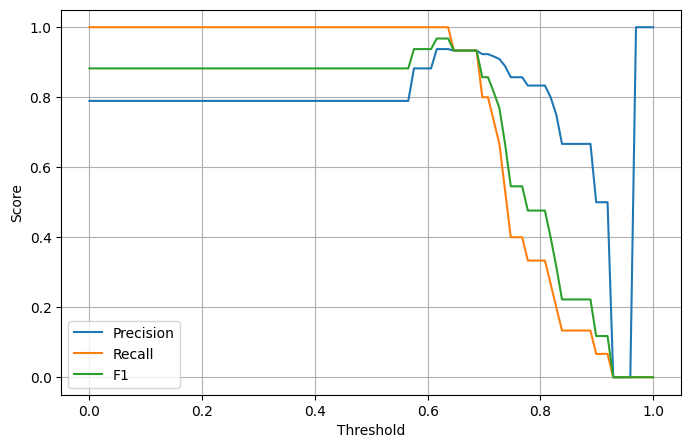

In [131]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(np.linspace(0, 1, 100), precisions, label="Precision")
plt.plot(np.linspace(0, 1, 100), recalls, label="Recall")
plt.plot(np.linspace(0, 1, 100), f1_scores, label="F1")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

In [132]:
y_pred = (logreg.predict_proba(X_test)[:, 1] >= 0.65).astype(int)
save_results(y_test, y_pred, 'LogReg', results)

In [133]:
df_results = pd.DataFrame(results)
df_results

,model,accuracy,precision,recall,f1,tn,fp,fn,tp
0,Dummy,0.80,0.800000,1.0000,0.888889,0,4,0,16
1,Bayes,0.80,0.800000,1.0000,0.888889,0,4,0,16
2,kNN,0.80,0.800000,1.0000,0.888889,0,4,0,16
3,LogReg,0.75,0.866667,0.8125,0.838710,2,2,3,13


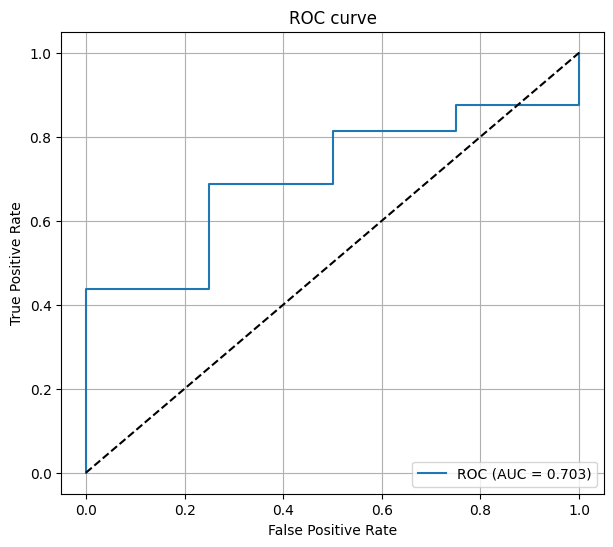

In [134]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_proba = logreg.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()